In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def criaMundoPequeno(N, Z, p):
    nodes = [x for x in range(N)]
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for i in range(N):
        for j in range(-Z//2, Z//2):
            neighbor_node = (i+j)%N
            if i != neighbor_node:
                G.add_edge(i, neighbor_node)
    numRandomEdge = int(np.floor(N*(Z//2)*p))
    for i in range(numRandomEdge):
        randomEdge1 = np.random.randint(N)
        randomEdge2 = np.random.randint(N)
        G.add_edge(randomEdge1, randomEdge2)
    
    return G

In [ ]:
def FindPathLengthsFromNode(graph: nx.graph.Graph, node: int):
    bfs = nx.bfs_layers(graph, node)
    distance = np.empty(graph.number_of_nodes())
    count = 0
    for layer in bfs:
        for node in layer:
            distance[node] = count
        count += 1

    return distance

In [ ]:
def FindAllPathLengths(graph: nx.graph.Graph):
    num_nodes = graph.number_of_nodes()
    distances_matrix = np.empty((num_nodes, num_nodes))

    for i in range(num_nodes):
        distances_matrix[i] = FindPathLengthsFromNode(graph, i)
    return distances_matrix

In [ ]:
def FindAveragePathLength(graph: nx.graph.Graph):
    distances_matrix = FindAllPathLengths(graph)
    return distances_matrix.mean()

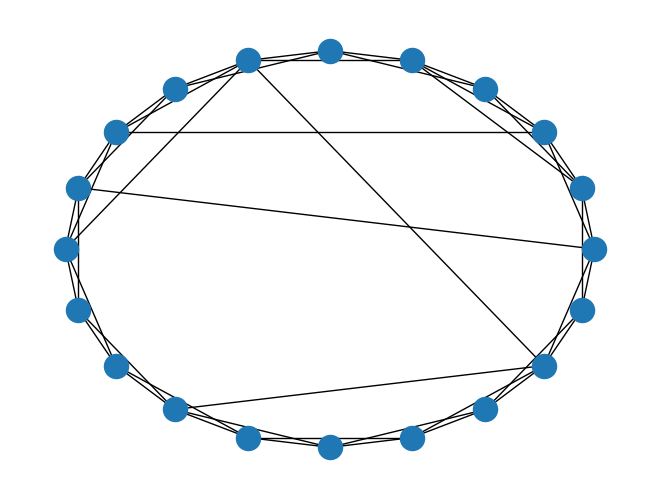

In [ ]:
G = criaMundoPequeno(20,4,0.2)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

## 1.2 

(2) FindAllPathLengths(graph), que gera uma lista de todos os comprimentos (um
por par de nós no gráfico) usando repetidamente FindPathLengthsFromNode.Verifique sua função testando se o histograma de comprimentos de caminho em
𝑝 = 0 é constante para 0 < 𝑑 < 𝑁/𝑍, conforme esperado. Gere gráficos para
𝑁 = 1.000 e 𝑍 = 2 para 𝑝 = 0,02 e 𝑝 = 0,2; exiba os gráficos circulares e trace o
histograma de comprimentos de caminho. Amplie o histograma; o quanto ele
muda com p? Que valor de p você precisaria para obter “seis graus de separação”?

### p = 0

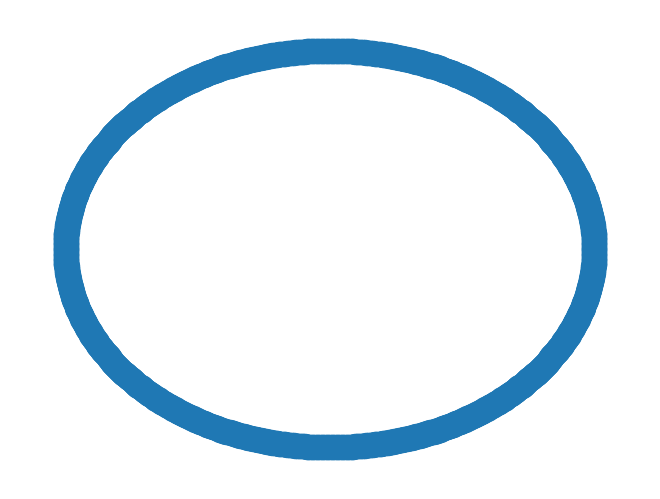

In [ ]:
G = criaMundoPequeno(1000, 2, 0)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

Para p = 0, a distruibuição das distancias entres os nós devem ser contantes e estarem no intervalo 0 < d < Z/2

Como podemos ver o gráfico abaixo está de acordo com essa propriedade com todas as distancias ocorrendo igualmente

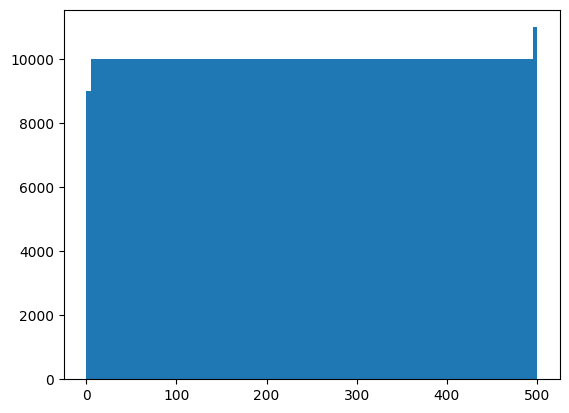

In [ ]:
plt.hist(FindAllPathLengths(G).flatten(), bins=100)
plt.show()

### p = 0.02

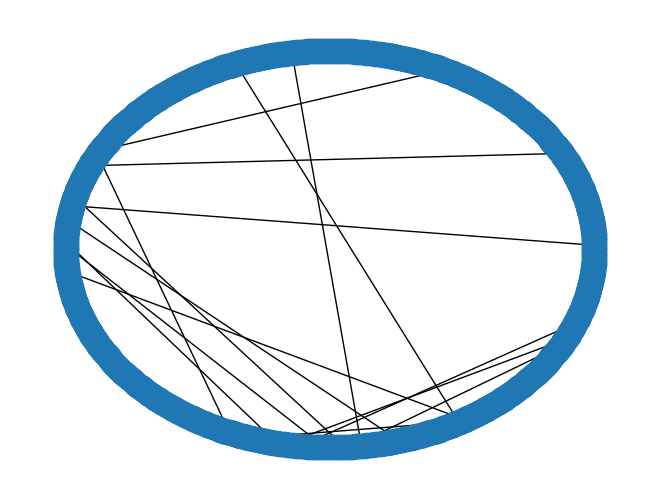

In [ ]:
G = criaMundoPequeno(1000, 2, 0.02)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

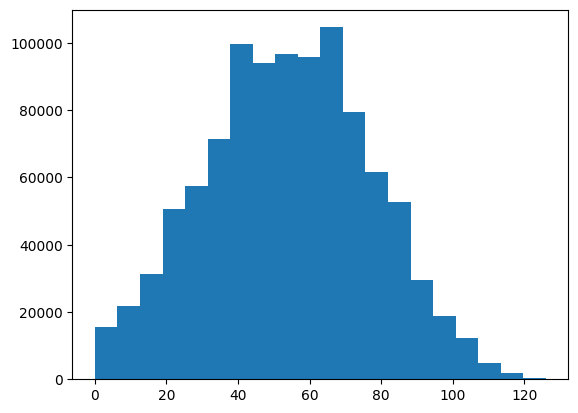

In [ ]:
plt.hist(FindAllPathLengths(G).flatten(), bins = 20)
plt.show()

### p = 0.2

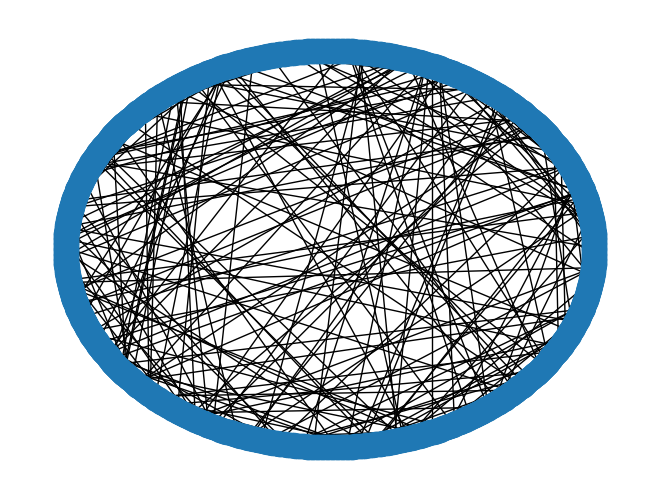

In [ ]:
G = criaMundoPequeno(1000, 2, 0.2)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

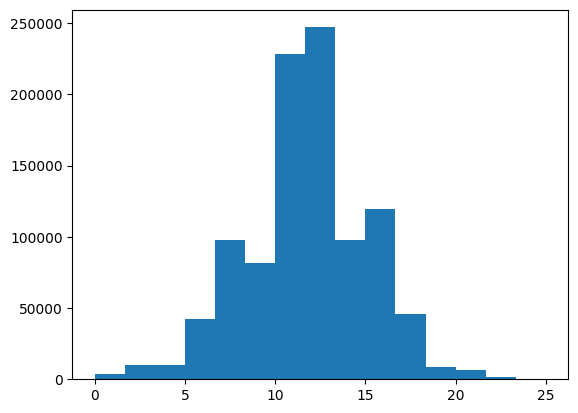

In [ ]:
plt.hist(FindAllPathLengths(G).flatten(), bins=15)
plt.show()


### 1.3

(3) FindAveragePathLength(graph), que calcula a média ⟨𝑑⟩ sobre todos os pares
de nós. Calcule 𝑑 para 𝑍 = 2, 𝑁 = 100 e 𝑝 = 0,1 algumas vezes; sua resposta
deve ser em torno de 𝑑 = 10. Observe que existem flutuações estatísticas
substanciais no valor de amostra para amostra. Aproximadamente quantas
arestas longas existem neste sistema? Você esperaria flutuações nas distâncias?

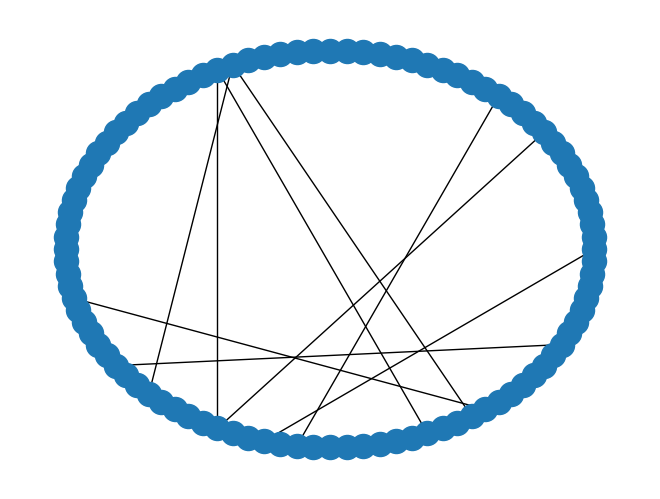

In [ ]:
G = criaMundoPequeno(100, 2, 0.1)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

No sistema acima existiria aproximadamente 10 arestas longas, conforme as arestas são distribuidas no sistema deverá haver flutações em torno do d.
Pois se as arestas tiverem uma distribuição uniforme e fizerem ligações tangencias no sistema o falor de d será minimo.

In [ ]:
# numRandomEdge = int(np.floor(N*(Z//2)*p))
print(f"Para a configuração N = 100, Z = 2 e p = 0.1 o Numero de arestas longas será {int(np.floor(100*(2//2)*0.1))}")

Para a configuração N = 100, Z = 2 e p = 0.1 o Numero de arestas longas será 10


In [ ]:
d_values = []
for _ in range(40):
    G = criaMundoPequeno(100, 2, 0.1)
    d_values.append(FindAveragePathLength(G))

In [ ]:
print(d_values)

[9.1122, 9.2942, 10.4262, 9.7162, 9.431, 12.3652, 9.7602, 9.546, 10.5702, 9.264, 8.6148, 10.142, 9.4334, 10.4664, 9.8802, 10.4052, 9.9246, 9.7622, 8.9678, 9.8258, 10.004, 9.3162, 10.3912, 9.075, 8.593, 9.1672, 9.472, 9.7214, 9.882, 9.0194, 9.9142, 9.4976, 10.5906, 9.3454, 9.2946, 9.9842, 9.7664, 9.3548, 10.3796, 8.9356]


In [ ]:
np.asarray(d_values).mean()

9.715305

## 1.4

(c) Plote o comprimento médio do caminho entre os nós 𝑑(𝑝) dividido por 𝑑(𝑝 = 0)
para 𝑍 = 2, 𝑁 = 50, em função de 𝑝 em um gráfico semi-log com valores entre 𝑝 =
0,001 e 𝑝 = 1000. (Dica : Sua curva deve ser semelhante à de Watts e Strogatz [3, Fig.
2], com os valores de 𝑝 deslocados por um fator de 100; veja a discussão do limite do
contínuo abaixo. Para visualizar melhor, gere valores de 𝑝 igualmente espaçados entre 10⁻³ e 10³" .) Por que o gráfico é fixado em um para 𝑝 pequeno?

In [ ]:
num  = 300
p_values = np.linspace(10**(-3), 10**3, num)
d_ratio = np.empty(num)

In [ ]:
# Grafico com p = 0
G_p0 = criaMundoPequeno(50, 2, 0)
d_p0 = FindAveragePathLength(G_p0)

In [ ]:
for i in range(num):
    G = criaMundoPequeno(50, 2, p_values[i])
    d_ratio[i] = FindAveragePathLength(G) / d_p0

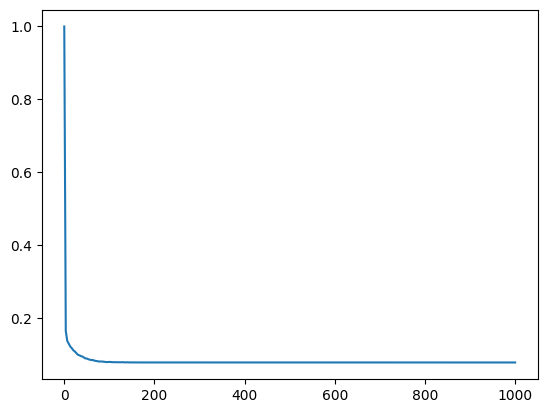

In [ ]:
plt.plot(p_values, (d_ratio))
plt.show()

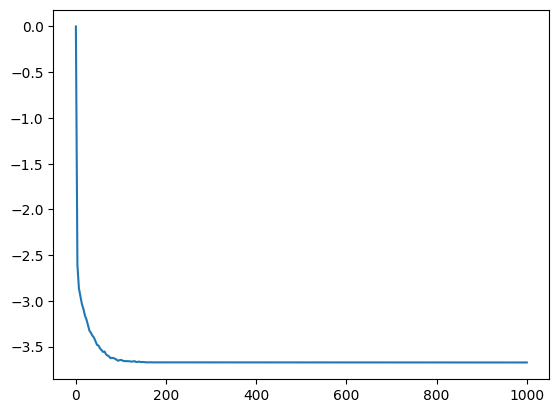

In [ ]:
plt.plot(p_values, np.log2(d_ratio))
plt.show()

## Grande 𝑵 e a emergência de um limite contínuo

In [ ]:
K = 2
N = 50

In [ ]:
num  = 300
p_values = np.linspace(10**(-3), 10**3, num)

In [ ]:
# Grafico com p = 0
G_p0 = criaMundoPequeno(N, K, 0)
d_p0 = FindAveragePathLength(G_p0)

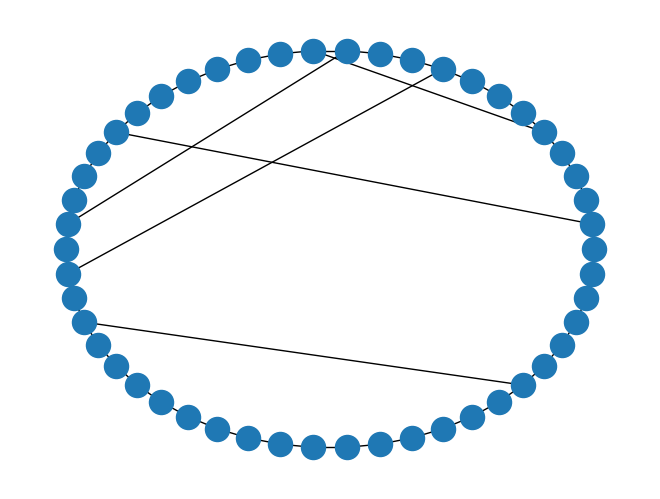

In [ ]:
G = criaMundoPequeno(50, 2, 0.1)
nx.draw(G, pos=nx.circular_layout(G))
plt.show()

In [ ]:
watts_strog_1 = nx.watts_strogatz_graph(1000, 10, 0.1)

In [ ]:
watts_strog_2 = nx.watts_strogatz_graph(1000, 10, 0.001)

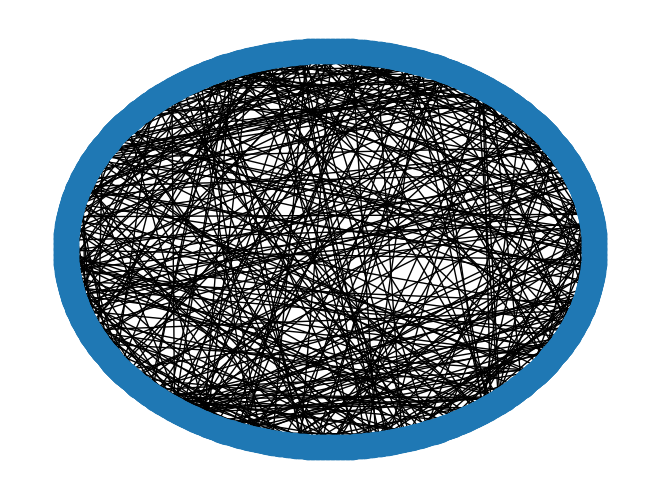

In [ ]:
nx.draw(watts_strog_1, pos=nx.circular_layout(watts_strog_1))
plt.show()

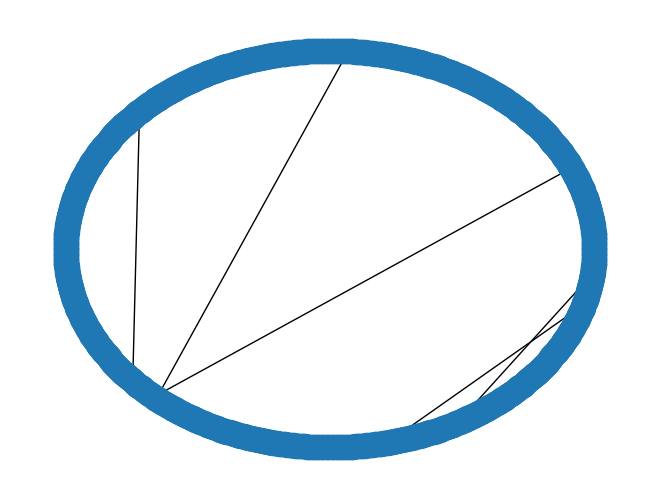

In [ ]:
nx.draw(watts_strog_2, pos=nx.circular_layout(watts_strog_2))
plt.show()

O grafico de mundo pequeo de watts e strogatz com p = 0.001, se aproxima mais do grafico utilizado na parte(c), pois o numero de arestas longas é semelhante

In [ ]:
num  = 10
p_values = np.linspace(10**(-3), 10**3, num)
N_values = np.linspace(100, 200, num)
Z_values = [2, 4]
num_shortcut = []
path_resize = []

for p in p_values:
    for N in N_values:
        for Z in Z_values:
            N = int(N)
            watts_strog = nx.watts_strogatz_graph(N, Z, p)
            d = FindAveragePathLength(watts_strog)
            num_shortcut.append(p * N * Z // 2)
            path_resize.append(np.pi * Z * d / N)


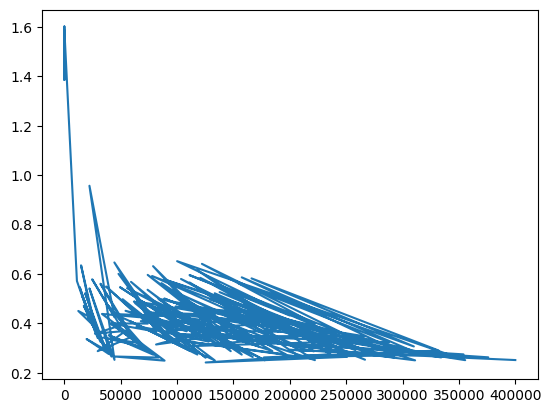

In [ ]:
plt.plot(num_shortcut, path_resize)
plt.show()